In [78]:
# Evelina Ramoskaite
# Textblob
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import itertools
import collections

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn import metrics
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import warnings
warnings.filterwarnings("ignore")




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\17086\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:

current_path = os.getcwd()
print(current_path)

C:\Users\17086\PycharmProjects\capstoneProject2\venv


In [30]:
# Loading the Data

data = pd.read_csv('rated_GOOGL.csv')
data.columns

Index(['timestamp', 'tweet_text', 'all_hashtags', 'retweet_count',
       'tweet_created_at', ' username', 'followers_count', 'target'],
      dtype='object')

In [31]:
# Decoding the text columns
#import ast
#data.tweet_text = data['tweet_text'].apply(ast.literal_eval).str.decode("utf-8")
#data.username = data[' username'].apply(ast.literal_eval).str.decode("utf-8")

In [32]:
# Tweets
data.tweet_text.head(10)

0    Today's Watchlist includes $GE $MFST $F $SL $M...
1    @1MainCapital I don’t think you can answer thi...
2    China Says 33 Apps Break Rules in Gathering Us...
3    [Last 24 Hours]  Stocks trending among elite #...
4    Mega cap stock and option trading model subscr...
5    5/3 WL  $TSLA calls over 718, resistance at 72...
6    $GOOGL weekly outlook: Raising pivot/sup 2295....
7    @WillPan23822266 Yeah but...  ...it’s exactly ...
8    #eth has not so smart "smart contract",but ind...
9    @cperruna @alphacharts365 A lot of folks try t...
Name: tweet_text, dtype: object

In [33]:
data.head(15)

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,5/3/2021 0:05,Today's Watchlist includes $GE $MFST $F $SL $M...,[],0,5/3/2021 0:05,microcapcompany,7491,neutral
1,5/3/2021 0:05,@1MainCapital I don’t think you can answer thi...,[],0,5/3/2021 0:05,retweettosender,1,negative
2,5/3/2021 0:16,China Says 33 Apps Break Rules in Gathering Us...,[],4,5/3/2021 0:16,smartertrader,48836,negative
3,5/3/2021 0:16,[Last 24 Hours] Stocks trending among elite #...,"['fintwit', 'investing', 'stocks', 'wallstreet...",0,5/3/2021 0:16,ffinapse,104,positive
4,5/3/2021 0:17,Mega cap stock and option trading model subscr...,[],0,5/3/2021 0:17,ProfectuSystems,422,neutral
5,5/3/2021 0:21,"5/3 WL $TSLA calls over 718, resistance at 72...",[],0,5/3/2021 0:21,ColtenRaider,510,positive
6,5/3/2021 0:23,$GOOGL weekly outlook: Raising pivot/sup 2295....,['StocksToTrade'],1,5/3/2021 0:23,mktparticipants,1572,positive
7,5/3/2021 0:25,@WillPan23822266 Yeah but... ...it’s exactly ...,[],0,5/3/2021 0:25,Wexboy_Value,6581,positive
8,5/3/2021 0:25,"#eth has not so smart ""smart contract"",but ind...","['eth', 'eth', 'bitcoin', 'bitcoin', 'litecoin...",1,5/3/2021 0:25,solaris23290390,1,neutral
9,5/3/2021 0:35,@cperruna @alphacharts365 A lot of folks try t...,[],0,5/3/2021 0:35,henleym25,142,negative


### Data Cleaning

In [34]:
# Preprocessing stage
import re  
  

In [36]:
#preprocess tweets

data.tweet_text =data.tweet_text.str.lower()  #tranform tweet col to lower case

#Remove handlers

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove hashtags

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("#", "", x))

# Remove $

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("$", "", x))

#remove all single characters

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))




In [37]:
# Tokenization
def tokenize(tweets):
    all_tweets = []
    for tweet in tweets:
        words = word_tokenize(tweet) 
        all_tweets.append(tweet)
    return all_tweets

In [38]:
data.tweet_text=tokenize(data.tweet_text)

In [39]:
data.head(10)

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,5/3/2021 0:05,today's watchlist includes $ge $mfst $f $sl $m...,[],0,5/3/2021 0:05,microcapcompany,7491,neutral
1,5/3/2021 0:05,don’t think you can answer this without substi...,[],0,5/3/2021 0:05,retweettosender,1,negative
2,5/3/2021 0:16,china says 33 apps break rules in gathering us...,[],4,5/3/2021 0:16,smartertrader,48836,negative
3,5/3/2021 0:16,[last 24 hours] stocks trending among elite fi...,"['fintwit', 'investing', 'stocks', 'wallstreet...",0,5/3/2021 0:16,ffinapse,104,positive
4,5/3/2021 0:17,mega cap stock and option trading model subscr...,[],0,5/3/2021 0:17,ProfectuSystems,422,neutral
5,5/3/2021 0:21,"5/3 wl $tsla calls over 718, resistance at 725...",[],0,5/3/2021 0:21,ColtenRaider,510,positive
6,5/3/2021 0:23,$googl weekly outlook: raising pivot/sup 2295....,['StocksToTrade'],1,5/3/2021 0:23,mktparticipants,1572,positive
7,5/3/2021 0:25,yeah but... ...it’s exactly the same $googl i...,[],0,5/3/2021 0:25,Wexboy_Value,6581,positive
8,5/3/2021 0:25,"eth has not so smart ""smart contract"",but inde...","['eth', 'eth', 'bitcoin', 'bitcoin', 'litecoin...",1,5/3/2021 0:25,solaris23290390,1,neutral
9,5/3/2021 0:35,lot of folks try to hold bitcoin tostandard th...,[],0,5/3/2021 0:35,henleym25,142,negative


In [40]:
# Stemming
def stemmer(tweets):
    ps = PorterStemmer()
    all_tweets = []
    for tweet in tweets:
        all_words = []
        for word in tweets:
            words = ps.stem(tweet) 
            all_words.append(words)
        all_tweets.append(all_words)
    return all_tweets

### Exploratory Analysis

In [41]:
data.describe().round(2)

,retweet_count,followers_count
count,417.00,417.00
mean,0.71,6857.84
std,4.37,30324.92
min,0.00,0.00
25%,0.00,154.00
50%,0.00,481.00
75%,0.00,3650.00
max,69.00,359999.00


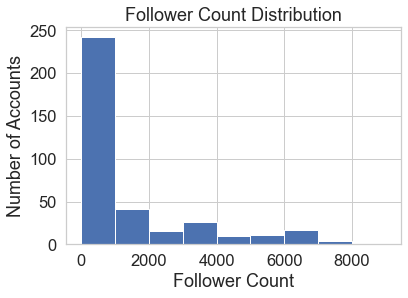

In [42]:
# follower counts
plt.hist(data['followers_count'],bins=range(0,10000,1000))
plt.xlabel('Follower Count')
plt.ylabel('Number of Accounts')
plt.title('Follower Count Distribution')
plt.show()

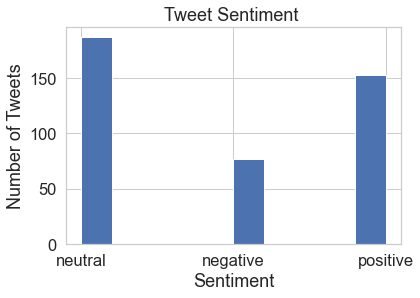

In [43]:
# Plotting vader sentiment score distribution
plt.hist(data.target)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Tweet Sentiment ')
plt.show()

In [44]:
# Comparing Follower and Retweet count for each category of sentiment 
data_positive = data.query('target=="positive"')
data_negative = data.query('target=="negative"')
data_neutral = data.query('target=="neutral"')


In [45]:
temp1 = data_positive["followers_count"].mean()
temp2 = data_neutral["followers_count"].mean()
temp3 = data_negative["followers_count"].mean()
print("Mean Follower Count (Positive) : " + str(temp1))
print("Mean Follower Count (Neutral) : " + str(temp2))
print("Mean Follower Count (Negative) : " + str(temp3))


Mean Follower Count (Positive) : 6647.6274509803925
Mean Follower Count (Neutral) : 7601.743315508022
Mean Follower Count (Negative) : 5468.935064935065


In [46]:
temp1 = data_positive["retweet_count"].mean()
temp2 = data_neutral["retweet_count"].mean()
temp3 = data_negative["retweet_count"].mean()
print("Mean Retweet Count (Positive) : " + str(temp1))
print("Mean Retweet Count (Neutral) : " + str(temp2))
print("Mean Retweet Count (Negative) : " + str(temp3))


Mean Retweet Count (Positive) : 0.5620915032679739
Mean Retweet Count (Neutral) : 1.0588235294117647
Mean Retweet Count (Negative) : 0.18181818181818182


In [47]:
data2=pd.get_dummies(data,columns=['target']).drop(index=1,columns=['tweet_text','timestamp','all_hashtags',' username'])

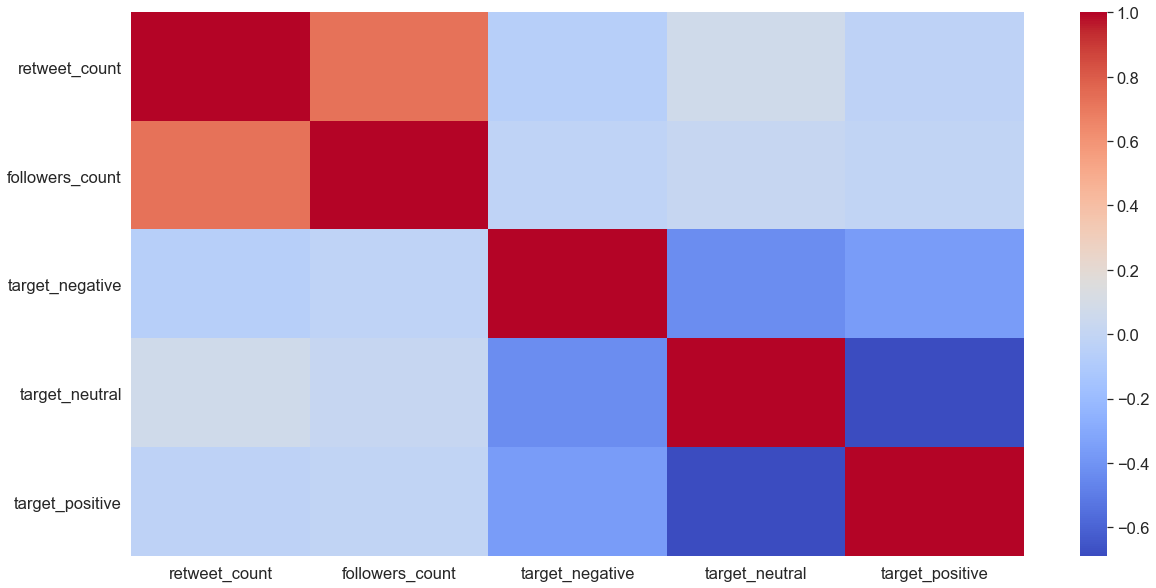

In [48]:
# correlation plot 
fig,ax = plt.subplots(figsize=(20,10))
c = data2.corr()
sns.heatmap(c,cmap='coolwarm')
plt.show()

## Wordcloud

In [49]:
def wc(data,bgcolor,stopWords):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, 
                   max_words = 100,
                   width =1600,
                   height = 800,
                  stopwords=stopWords)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [50]:
# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['google','googl','goog','stocks','stock','alphabet','fb','spx','apple','qqq','amazon','msft','amzn','spy','btc','amd','nflx','wmt','tsla','nvda']


#### Many people referenced the same popular stocks in their tweets, as well as references to index funds, regardless of which stock I examined. They obscured other more valuable indicators of sentiment, so I chose to include those in the stopword list. 

### Word Cloud for Positive tweets

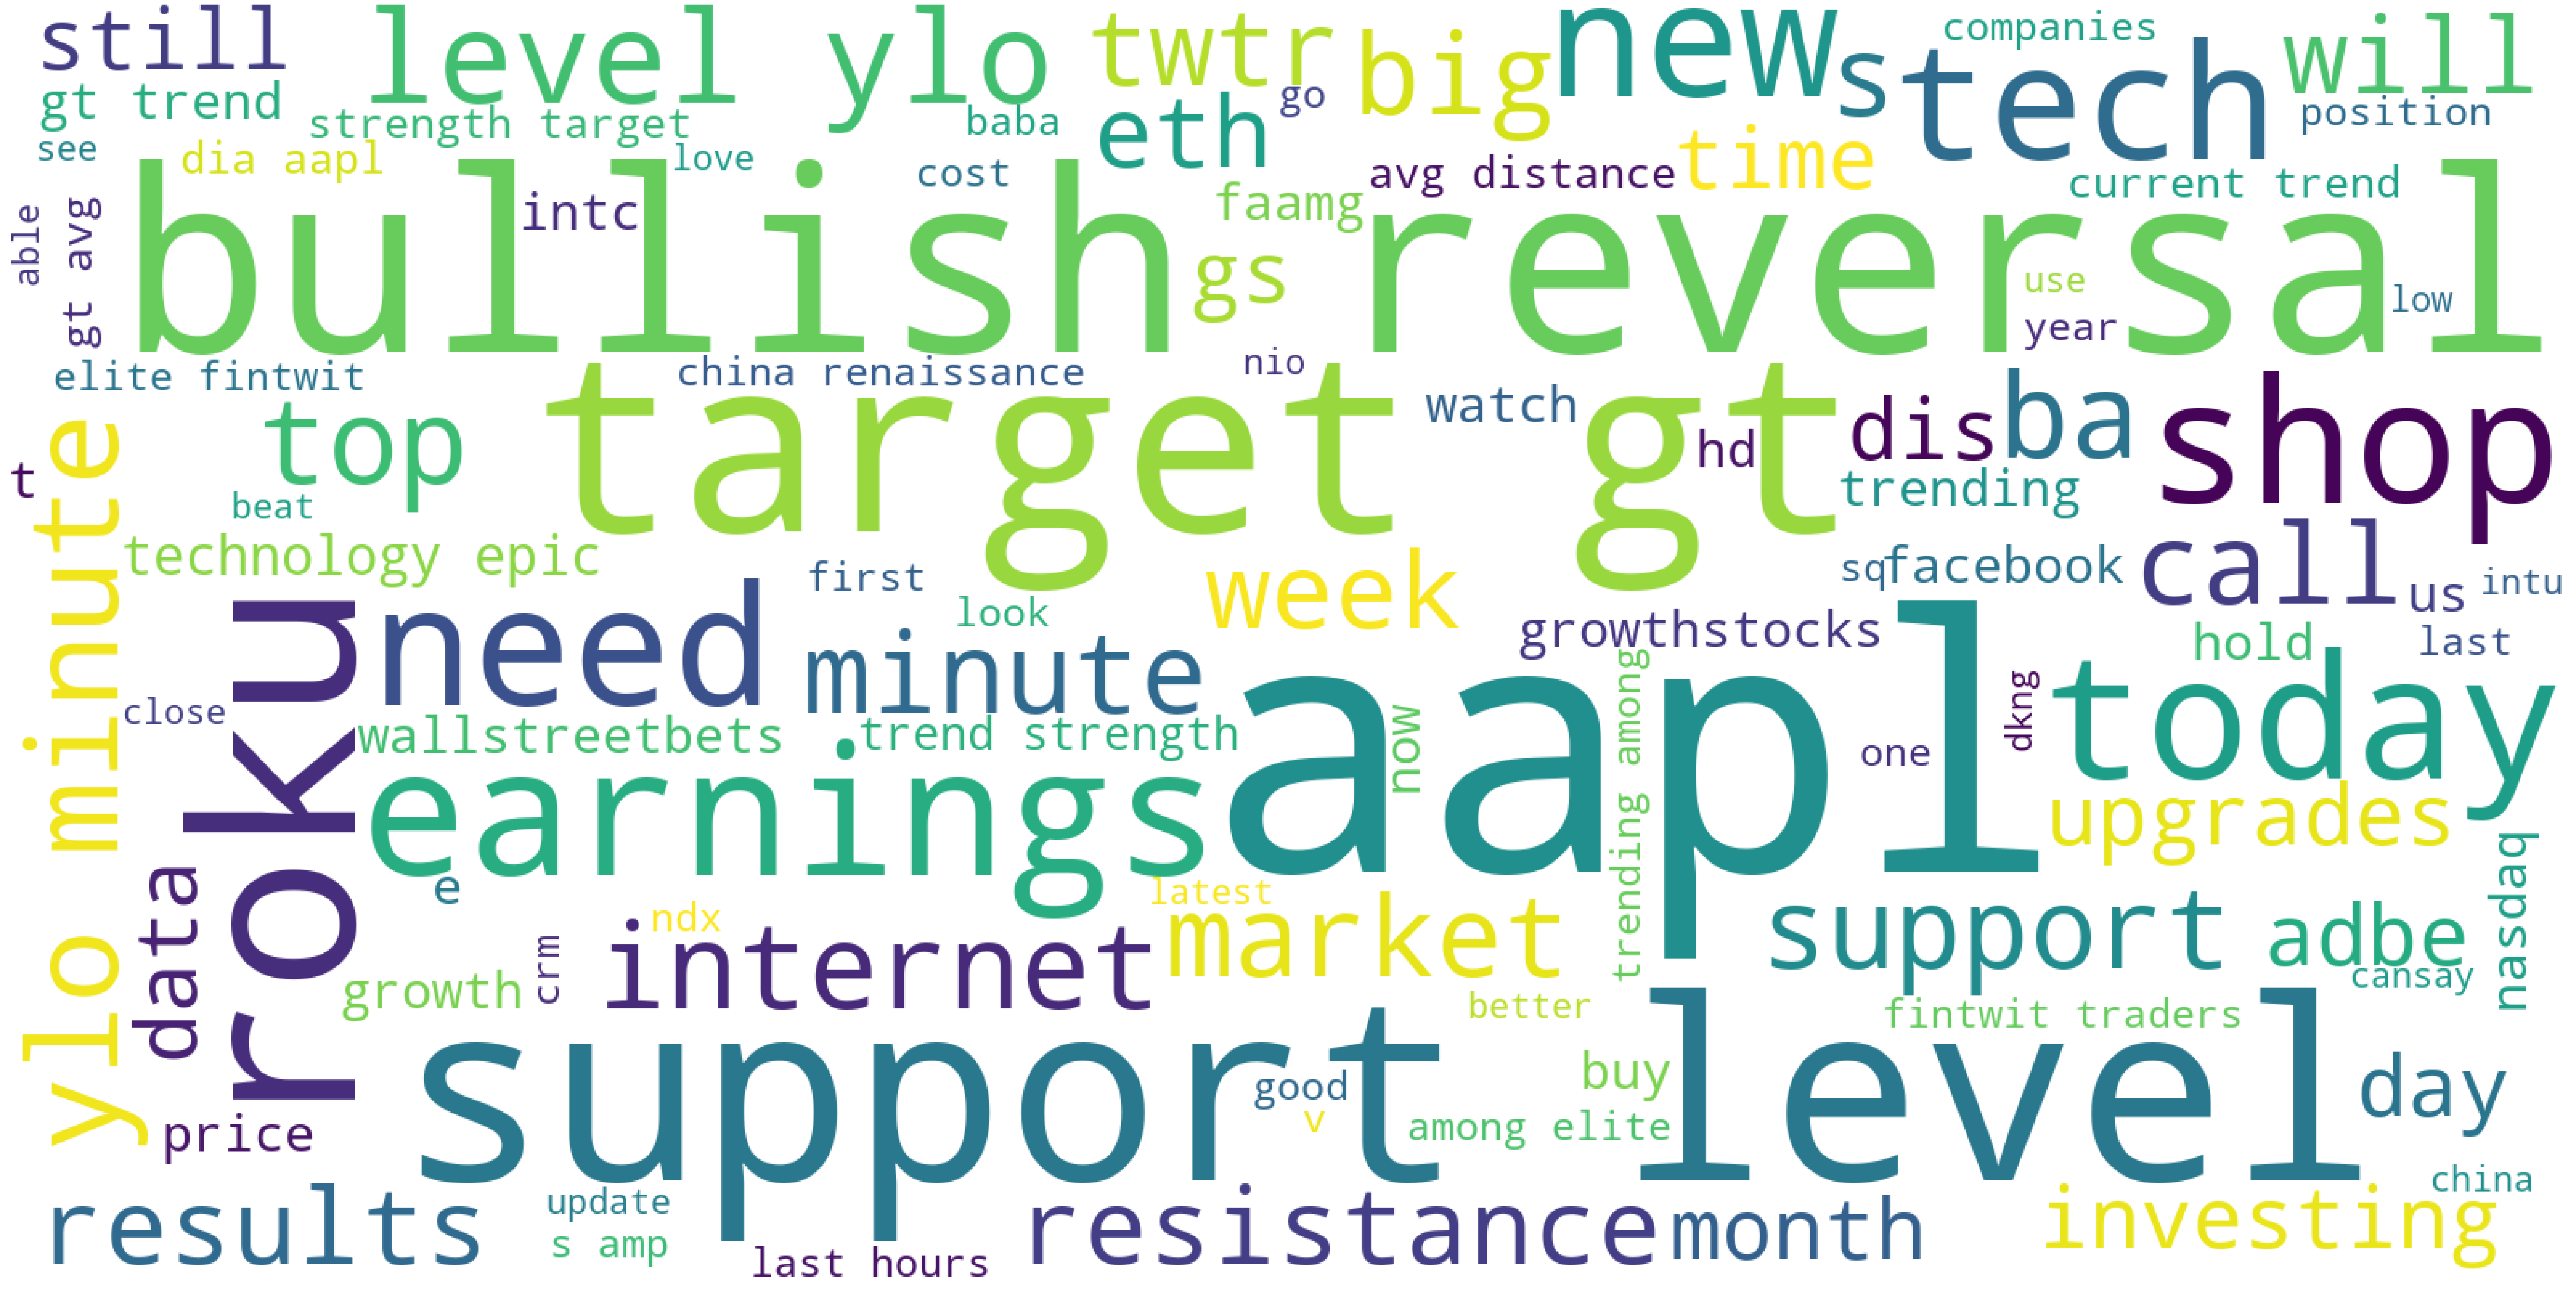

In [51]:
wc(data_positive.tweet_text,'white',customStopwords )

### Word Cloud for Neutral Tweets

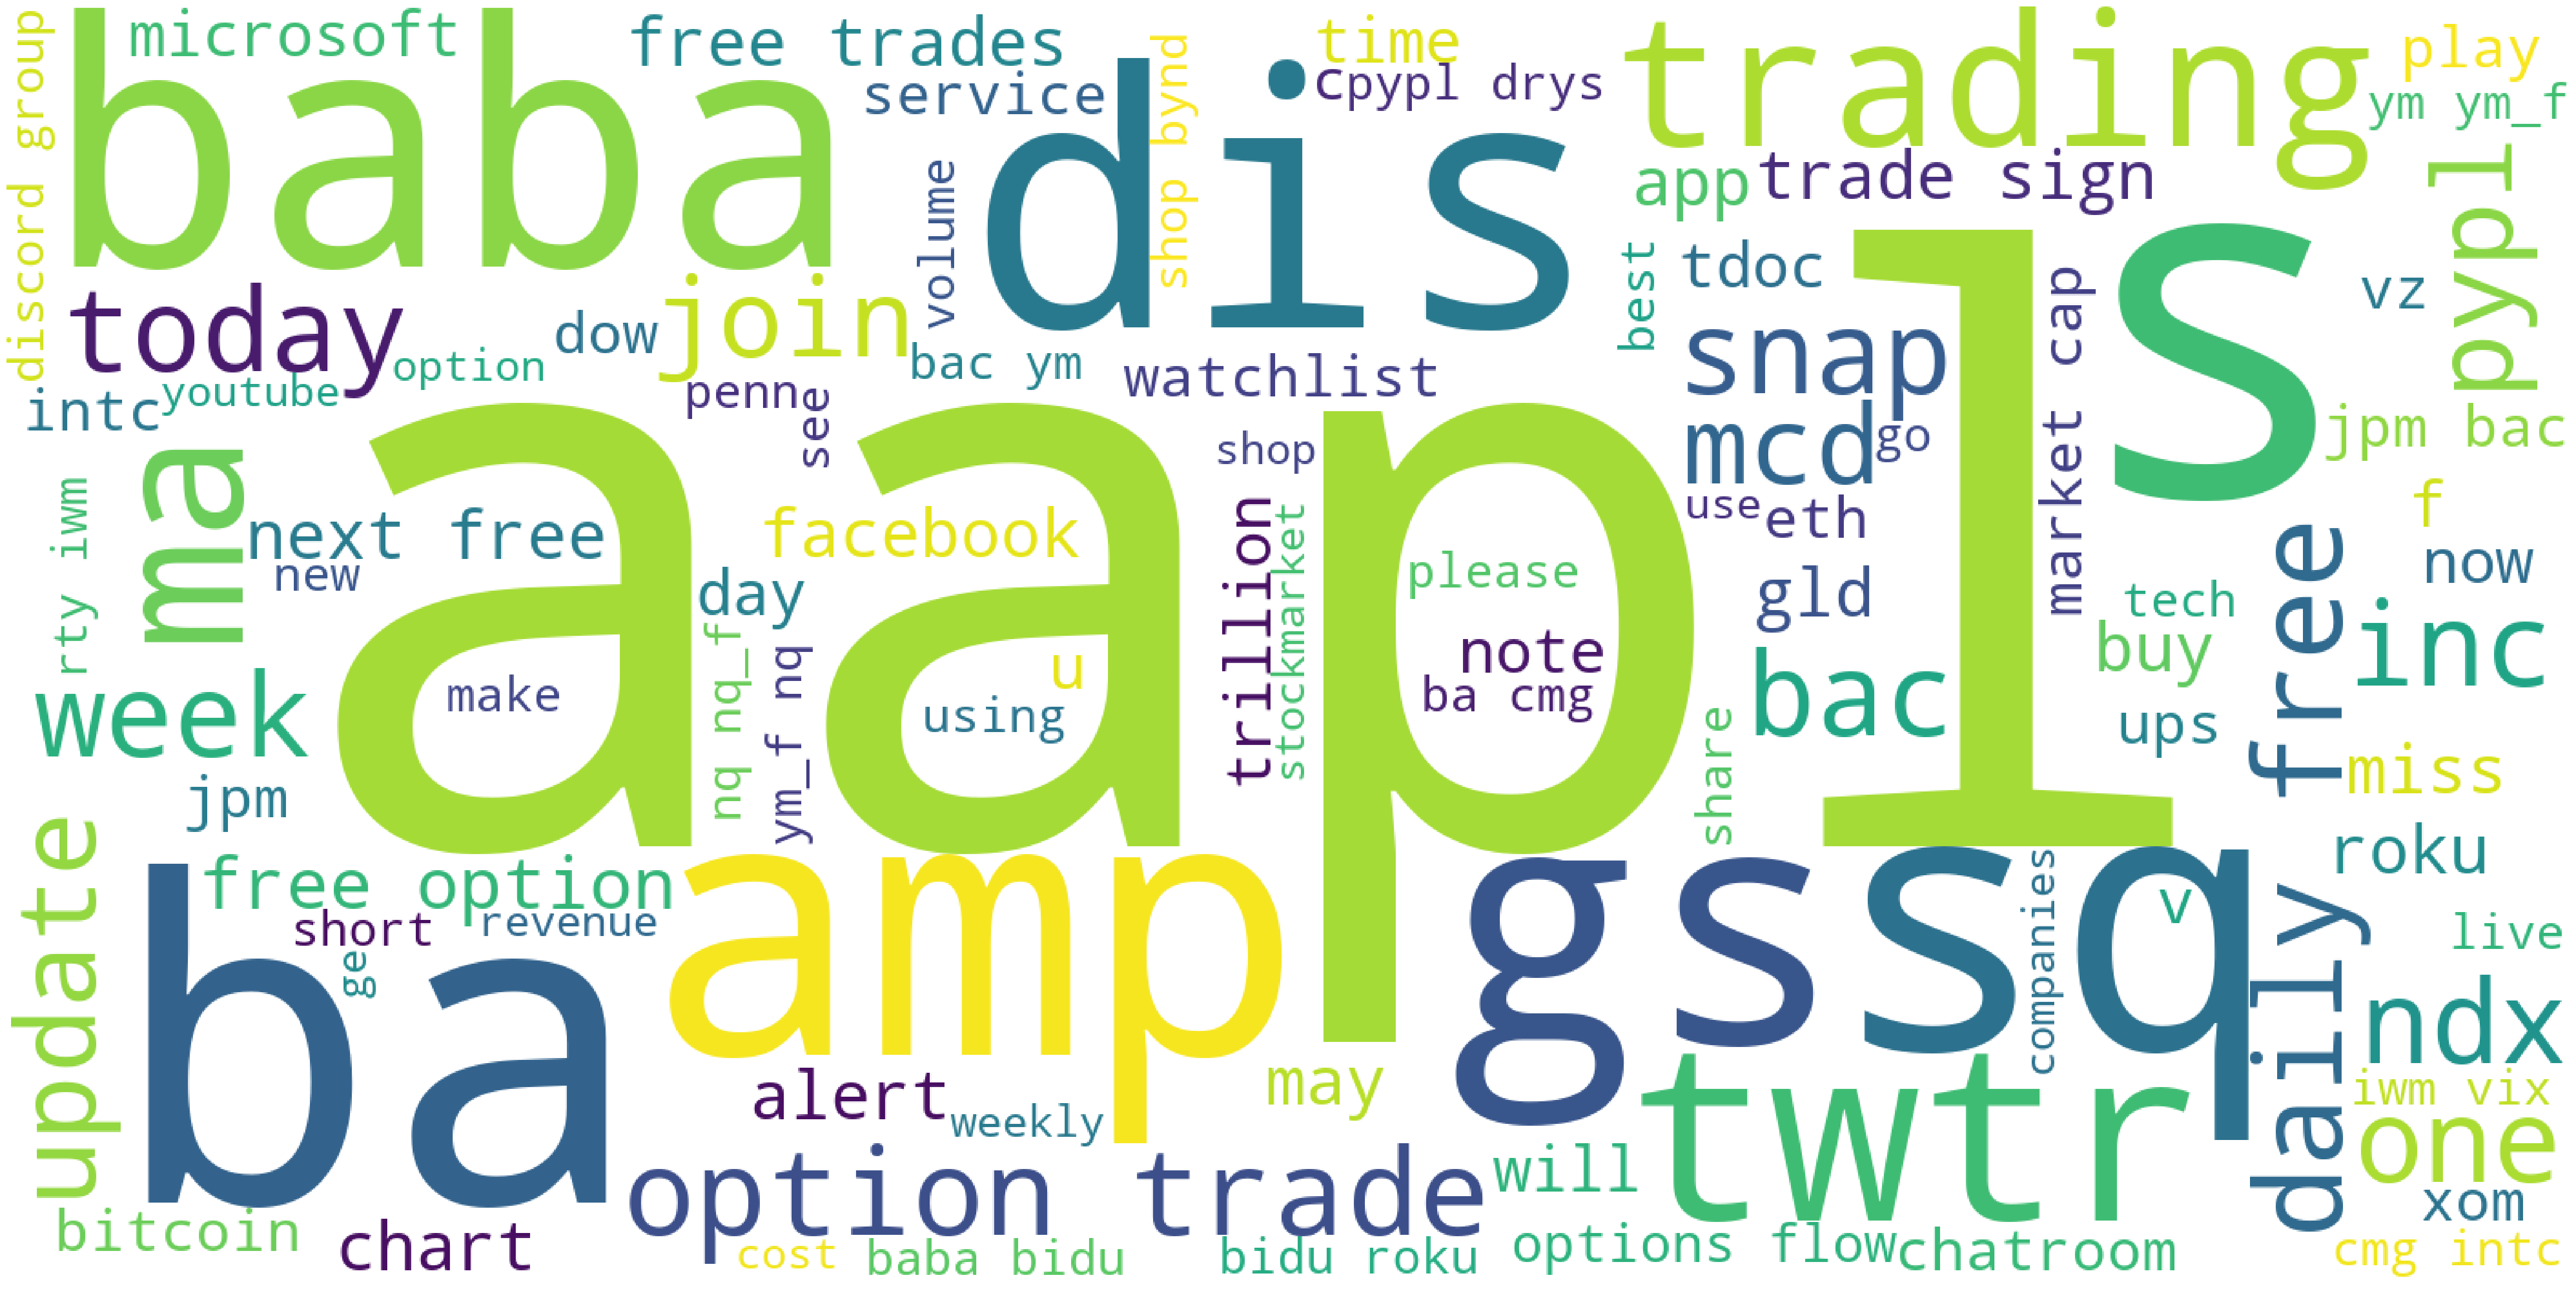

In [52]:
wc(data_neutral.tweet_text,'white',customStopwords )

### Word Cloud for Negative Tweets

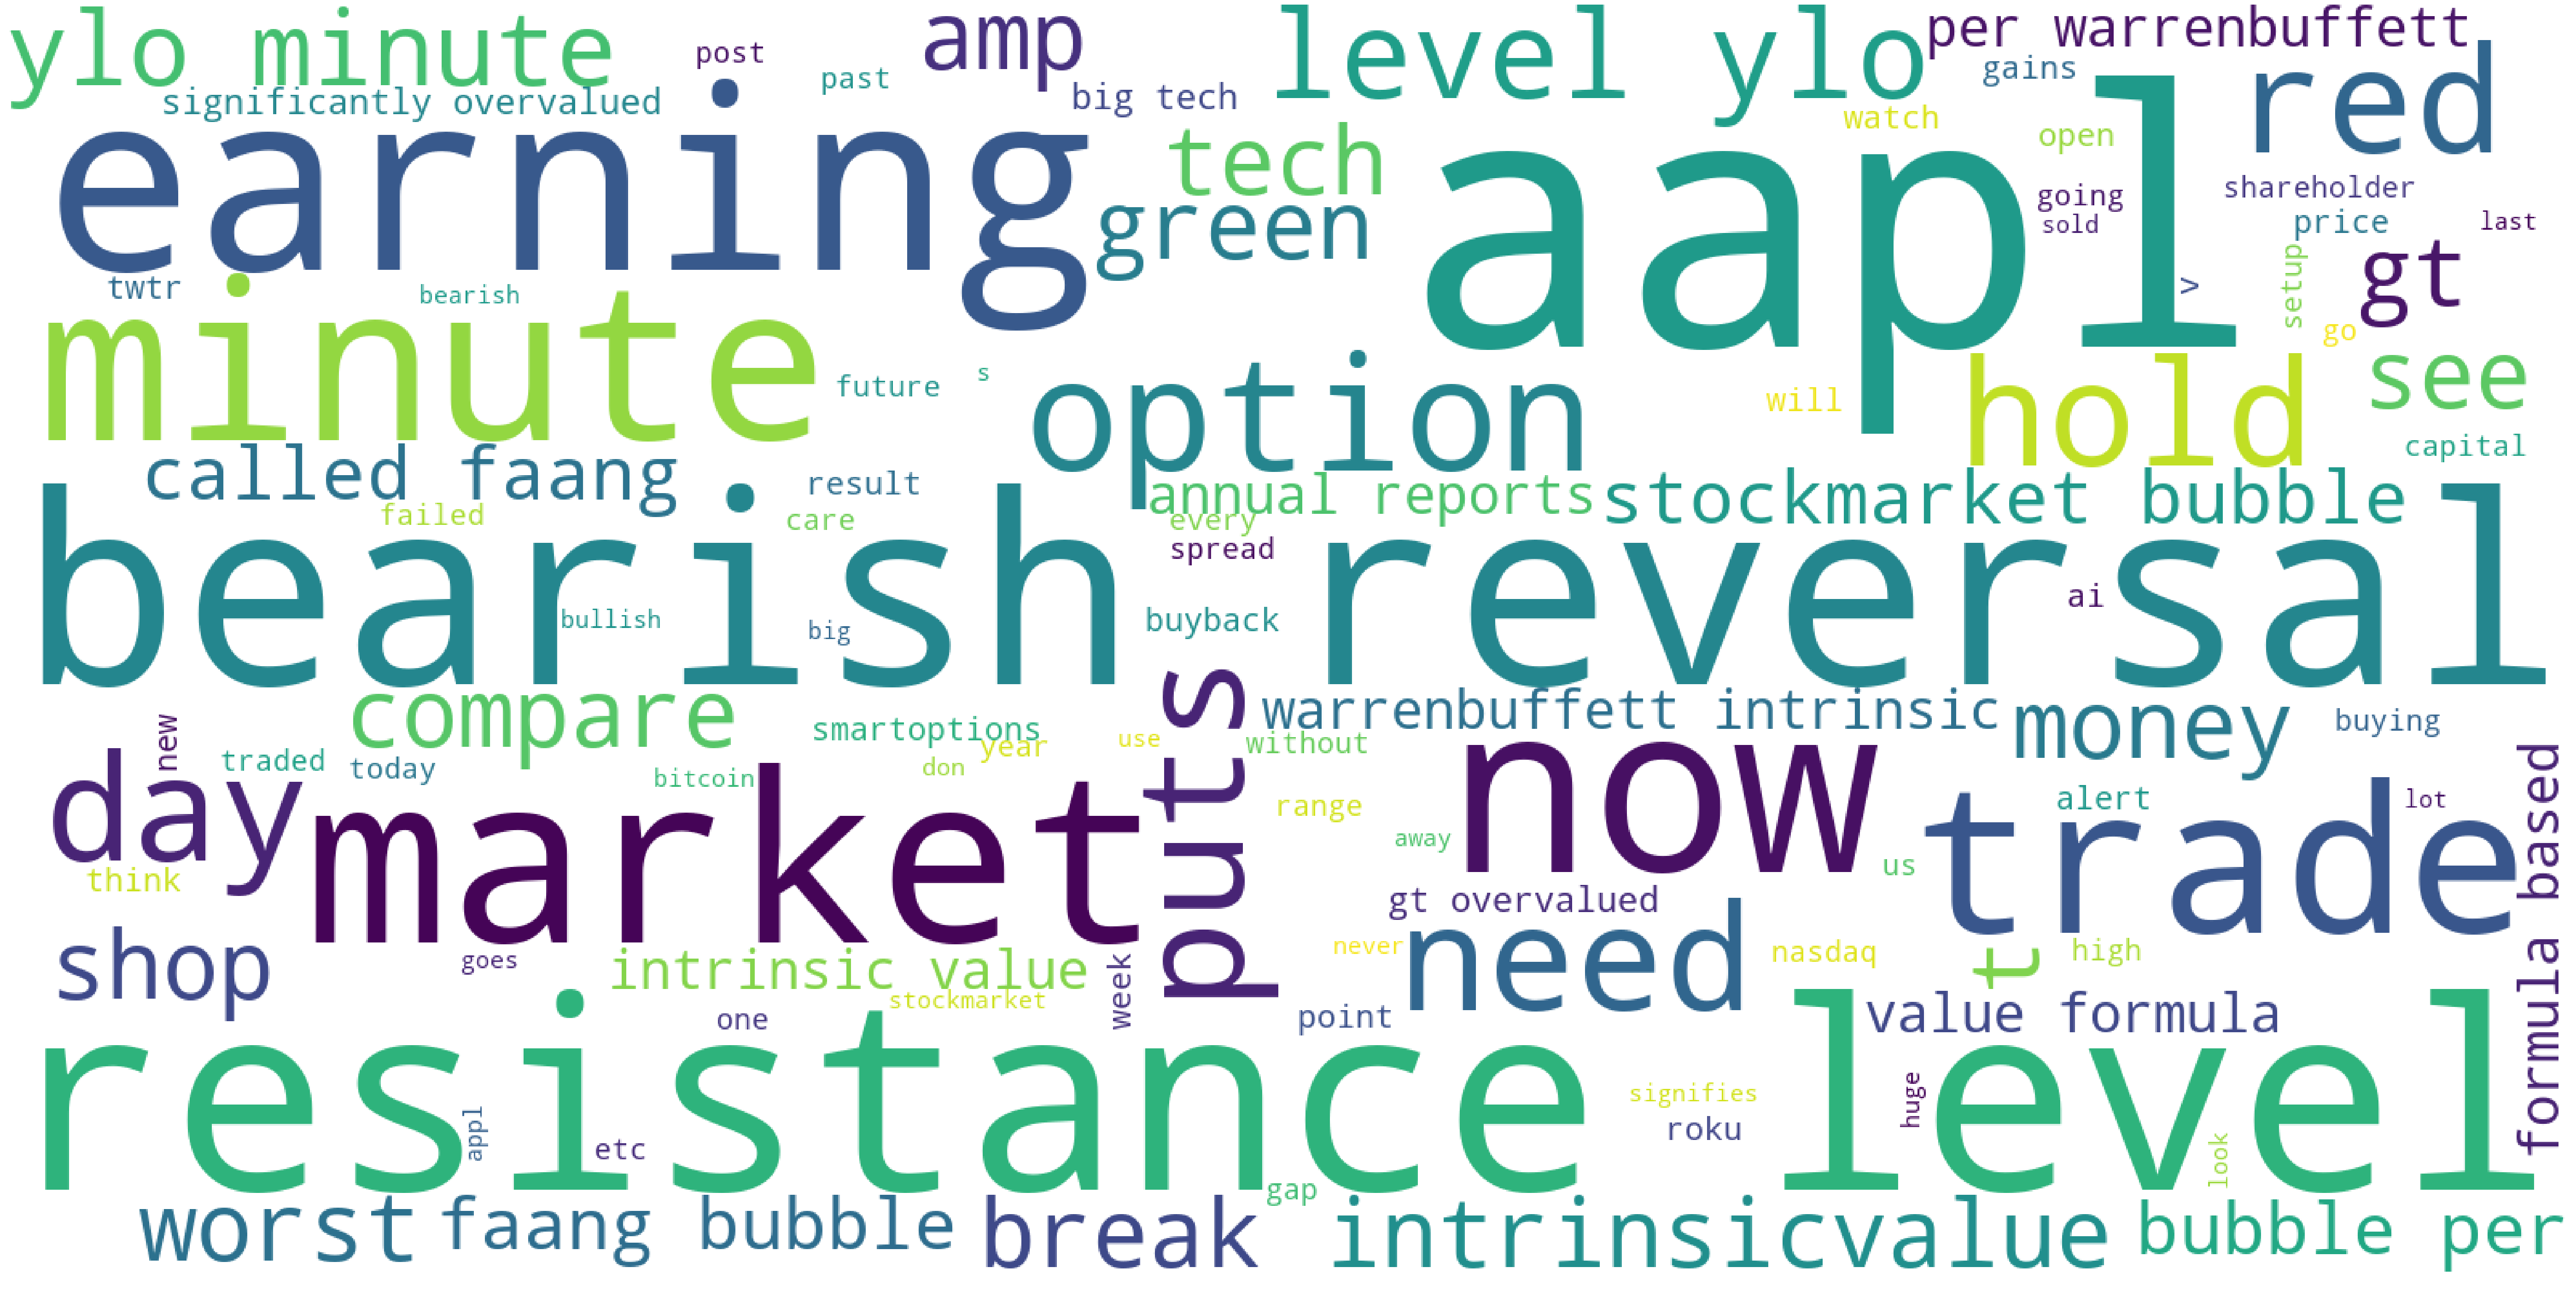

In [53]:
wc(data_negative.tweet_text,'white',customStopwords )

# Sentiment Analysis

## Lexicon-Based Methods
### There are rule-based models, where sentiment is ranked by a pre-defined dictionary. There is no learning involved.


In [76]:
# evaluation script
def evaluation(pred,expected):
    from sklearn.metrics import confusion_matrix
    confusion_matrix =  pd.crosstab(index=expected, columns=pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 50)
    plt.show()
    print (metrics.classification_report(expected,preds,digits=4))
    acc=accuracy_score(expected,pred)
    print('Accuracy Score: '+str(acc))
    

### Fetching sentiment with textblob

In [54]:
# sentiment prediction
def textblob_sentiment(text):
    sentiment = []
    for i in text: 
        analysis = TextBlob(i)
        # set sentiment 
        if analysis.sentiment.polarity > 0:
            sentiment.append('positive')
        elif analysis.sentiment.polarity < 0:
            sentiment.append('negative')
        else:
             sentiment.append('neutral')
    return sentiment

In [55]:
# adding textblob sentiment to dataframe
data['textblob'] = textblob_sentiment(data.tweet_text)

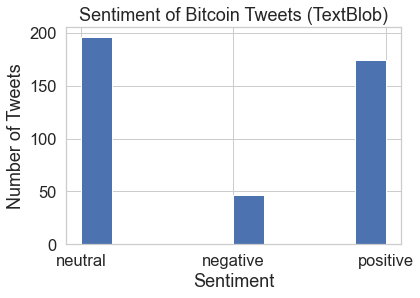

In [56]:
#plotting sentiment score results
plt.hist(data.textblob)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (TextBlob)')
plt.show()

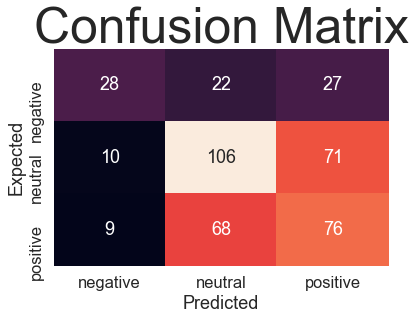

              precision    recall  f1-score   support

    negative     0.5957    0.3636    0.4516        77
     neutral     0.5408    0.5668    0.5535       187
    positive     0.4368    0.4967    0.4648       153

    accuracy                         0.5036       417
   macro avg     0.5244    0.4757    0.4900       417
weighted avg     0.5128    0.5036    0.5022       417

Accuracy Score: 0.5035971223021583


In [84]:
# evaluation
evaluation(data.textblob,data.target)

###  Vader

In [57]:
def vader_sentiment(text):
    sentiment = []
    for i in text: 
        sid = SentimentIntensityAnalyzer()
        # set sentiment 
        ss = sid.polarity_scores(i)
        if ss["compound"] > 0:
            sentiment.append('positive')
        elif ss["compound"] < 0:
            sentiment.append('negative')
        else:
            sentiment.append('neutral')
    return sentiment

In [58]:
def vader_scores(text):
    sentiment={}

In [65]:
vader_sentiment(['Bitcoin is Awesome'])

['positive']

In [70]:
vader_sentiment(['Just Lost 10k. Thanks Elon.'])

['negative']

In [61]:
# adding vader sentiment to dataframe
data['vader'] = vader_sentiment(data.tweet_text)

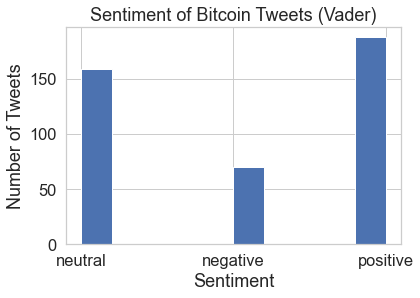

In [62]:
# Plotting vader sentiment score distribution
plt.hist(data.vader)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (Vader)')
plt.show()

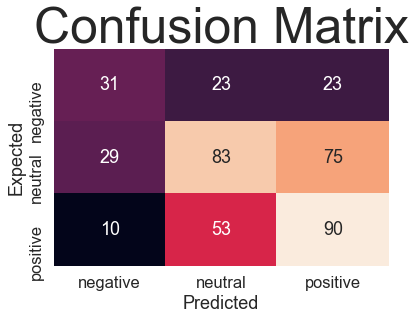

              precision    recall  f1-score   support

    negative     0.5957    0.3636    0.4516        77
     neutral     0.5408    0.5668    0.5535       187
    positive     0.4368    0.4967    0.4648       153

    accuracy                         0.5036       417
   macro avg     0.5244    0.4757    0.4900       417
weighted avg     0.5128    0.5036    0.5022       417

Accuracy Score: 0.4892086330935252


In [83]:
evaluation(data.vader,data.target)